In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the data
file_path = 'marketing_data.csv'
df = pd.read_csv(file_path, encoding='UTF-8-SIG')

# Display the first few rows of the dataframe to inspect
print(df.head())

      ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [3]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes
print(missing_values)
print(data_types)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency            

In [4]:
# Cleaning the data
import numpy as np

tqdm.pandas()

# Remove leading/trailing spaces from column names
df.columns = [col.strip() for col in df.columns]

# Convert 'Income' to numeric, removing any non-numeric characters
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Fill missing values in 'Income' with the median income
df['Income'].fillna(df['Income'].median(), inplace=True)

In [5]:
# Check for any duplicate rows
duplicates = df.duplicated().sum()
print('Number of duplicate rows:', duplicates)

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Check for any remaining missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\
', missing_values)

Number of duplicate rows: 0
Missing values in each column: ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


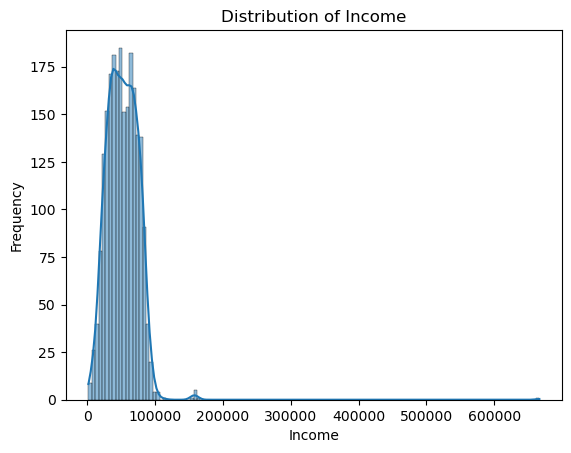

In [6]:
# Visualizations
# Distribution of Income
plt.figure(facecolor='white')
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Save the distribution plot as an image file
plt.savefig('distribution_income.png', dpi=300, bbox_inches='tight')

# Show the distribution plot
plt.show()

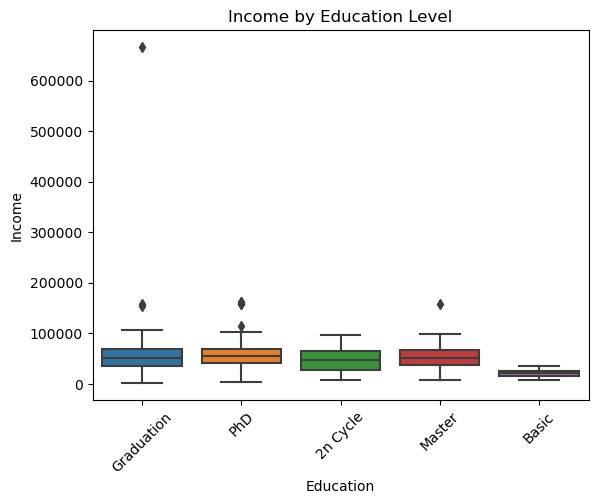

In [7]:
# Boxplot of Income by Education level
plt.figure(facecolor='white')
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)

# Save the boxplot as an image file
plt.savefig('boxplot_income_education.png', dpi=300, bbox_inches='tight')

# Show the boxplot
plt.show()

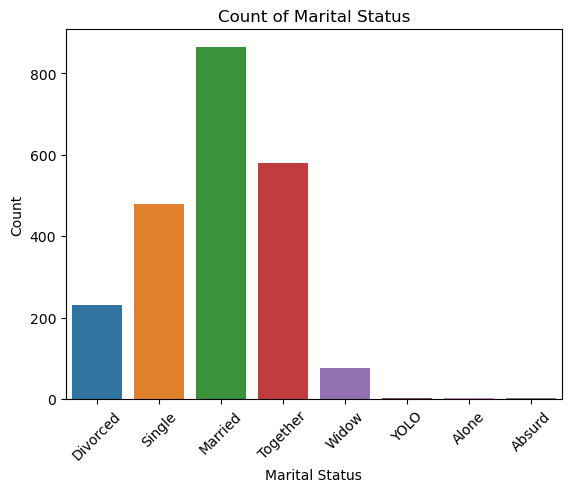

In [8]:
# Countplot of Marital Status
plt.figure(facecolor='white')
sns.countplot(x='Marital_Status', data=df)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Save the countplot as an image file
plt.savefig('countplot_marital_status.png', dpi=300, bbox_inches='tight')

# Show the countplot
plt.show()

In [9]:
# Select features and target variable
features = df.drop(columns=['ID', 'Dt_Customer', 'Response', 'Complain', 'Country'])
target = df['Response']

# Convert categorical variables to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


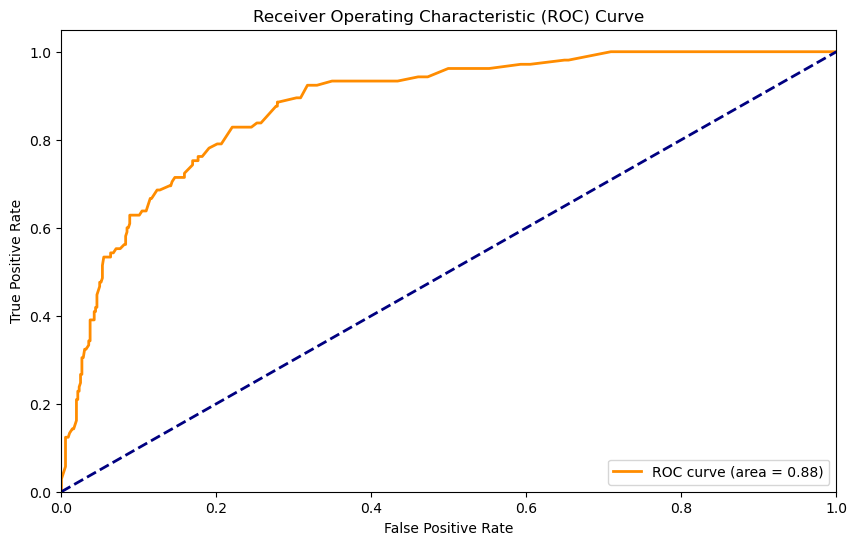

In [10]:
# Plot ROC curve
plt.figure(facecolor='white', figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the ROC curve as an image file
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')

# Show the ROC curve
plt.show()

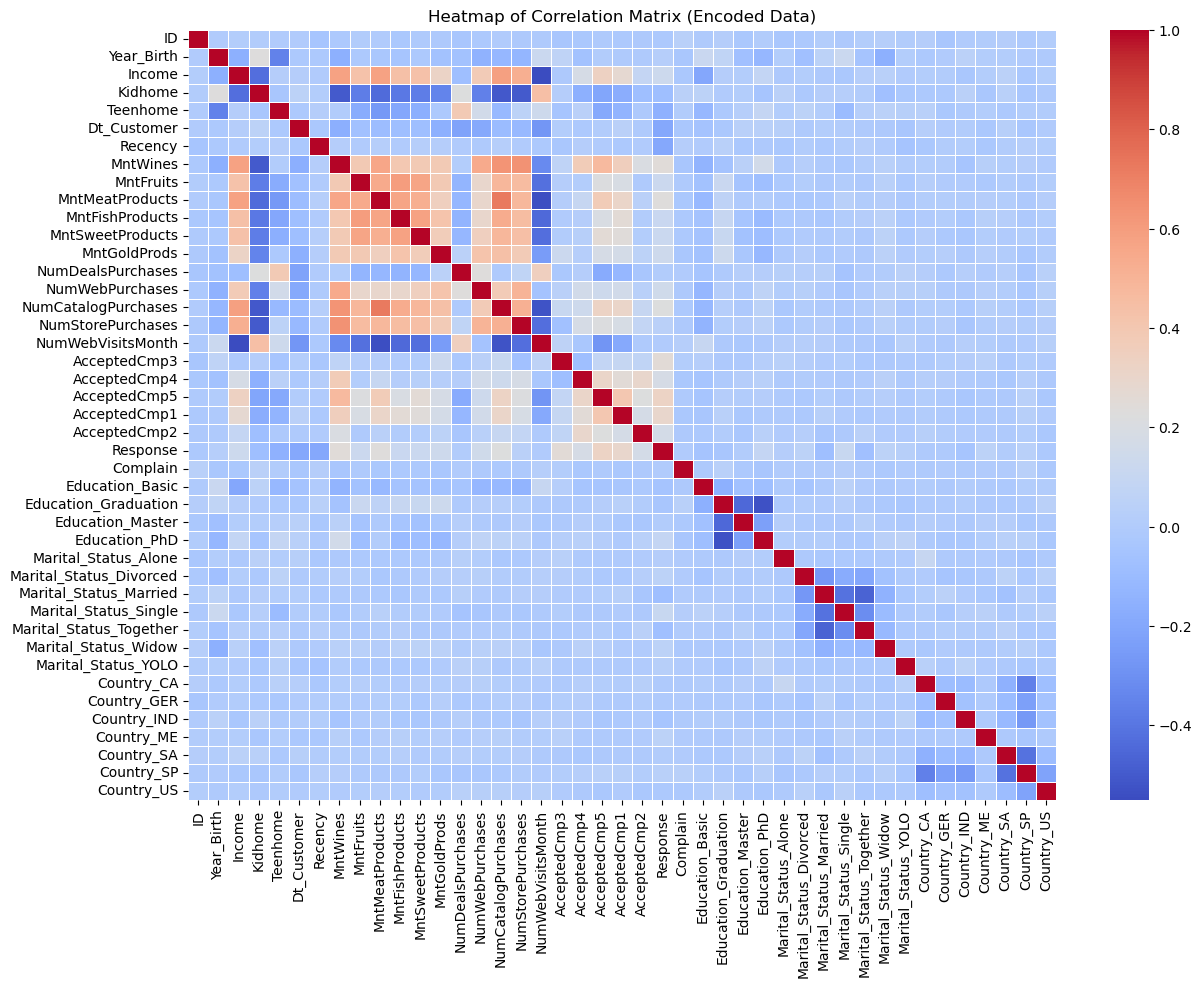

In [11]:
# Encode categorical variables using one-hot encoding
encoded_df = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix using the encoded data
corr_matrix_encoded = encoded_df.corr()

# Generate a heatmap of the correlation matrix using the encoded data
plt.figure(facecolor='white', figsize=(14, 10))
sns.heatmap(corr_matrix_encoded, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Encoded Data)')

# Save the heatmap as an image file
plt.savefig('heatmap_correlation_encoded.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

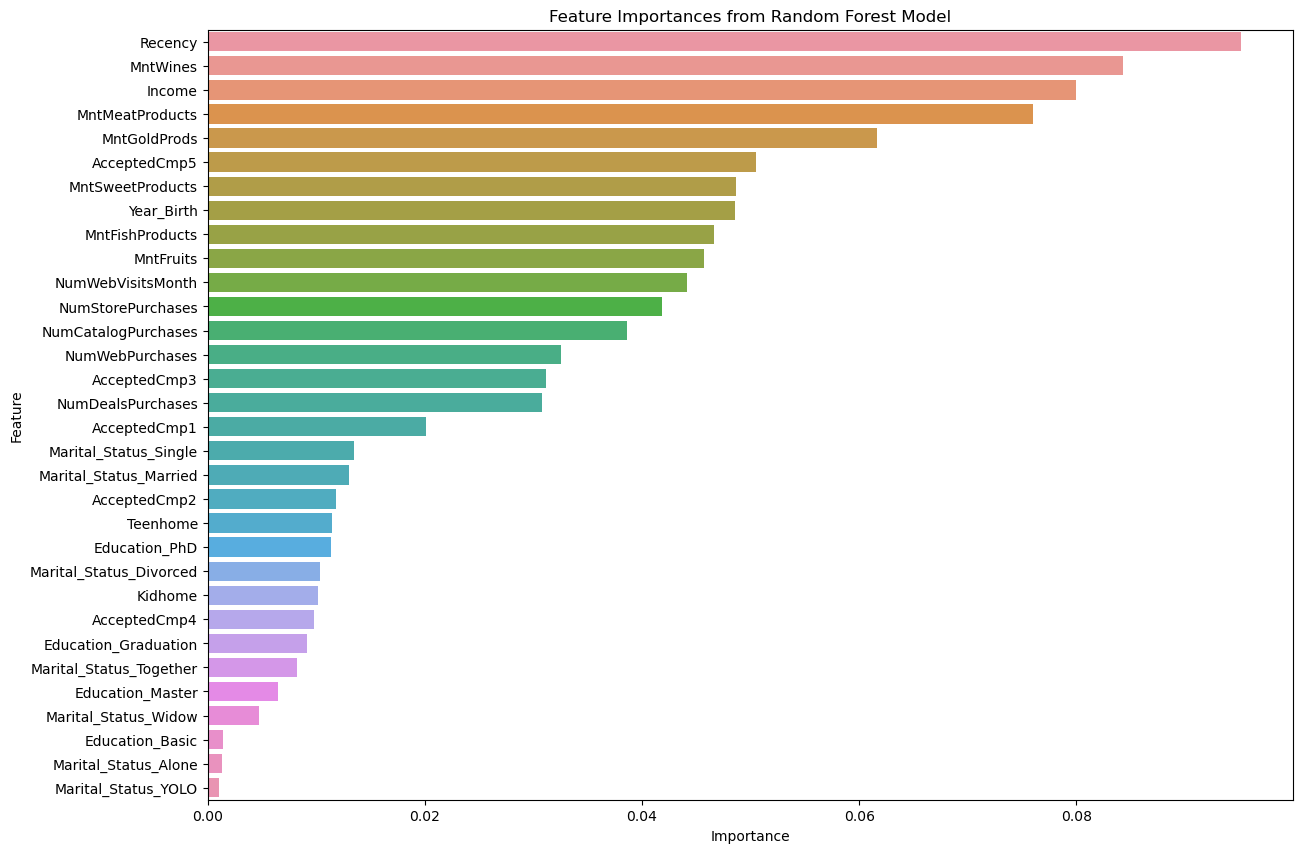

In [12]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(facecolor='white', figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Save the feature importances as an image file
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()